In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Create your df here:
df = pd.read_csv("profiles.csv")

#general data exploration
print(df.columns)
print(df.job.head())
print(df.essay2[15])
print(df.head())

Index([u'age', u'body_type', u'diet', u'drinks', u'drugs', u'education',
       u'essay0', u'essay1', u'essay2', u'essay3', u'essay4', u'essay5',
       u'essay6', u'essay7', u'essay8', u'essay9', u'ethnicity', u'height',
       u'income', u'job', u'last_online', u'location', u'offspring',
       u'orientation', u'pets', u'religion', u'sex', u'sign', u'smokes',
       u'speaks', u'status'],
      dtype='object')
0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object
obscure dances from the '30's and '40's, laughing at myself, being
playful in general, and working with children.
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23          

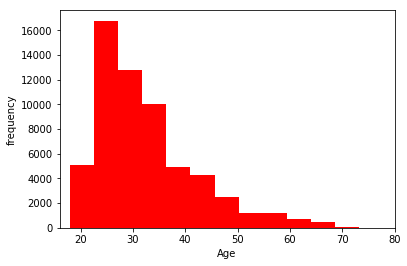

In [5]:
#general age distribution in dataset
plt.hist(df.age, bins=20, color="red")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.xlim(16,80)
plt.show()


In [347]:
df.sign.value_counts()


gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

m    35829
f    24117
Name: sex, dtype: int64
23254
15475


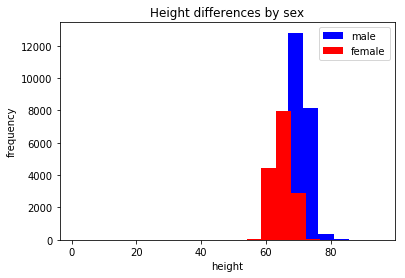

In [6]:
# identify indicies for male and female cohort
print(df.sex.value_counts())
male_inds = df.loc[df['sex'] == 'm']
male_inds = male_inds.dropna(subset=['sex','height','age','income','orientation','drinks','religion'])
female_inds = df.loc[df['sex'] == 'f']
female_inds = female_inds.dropna(subset=['sex','height','age','income','orientation','drinks','religion'])
print(len(male_inds))
print(len(female_inds))

# identify indicies for young and old cohort
young_inds = df.loc[df['age'] < 36]
young_inds = young_inds.dropna(subset=['sex','height','age','income','orientation','drinks','religion'])
old_inds = df.loc[df['age'] > 54]
old_inds = old_inds.dropna(subset=['sex','height','age','income','orientation','drinks','religion'])
# print(len(young_inds))
# print(len(old_inds))


plt.hist(male_inds.height,bins=20, color="blue")
plt.hist(female_inds.height,bins=20, color="red")
plt.xlabel("height")
plt.ylabel("frequency")
plt.legend(('male', 'female'),loc='upper right')
plt.title("Height differences by sex")
plt.show()

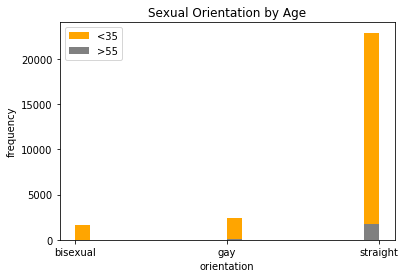

In [348]:
# plt.hist(male_inds.orientation,bins=20, color="blue")
# plt.hist(female_inds.orientation,bins=20, color="red")
plt.hist(young_inds.orientation,bins=20, color="orange")
plt.hist(old_inds.orientation,bins=20, color="grey")
plt.xlabel("orientation")
plt.ylabel("frequency")
plt.legend(('<35', '>55'),loc='upper left')
# plt.legend(('male', 'female'),loc='upper left')

plt.title("Sexual Orientation by Age")
plt.show()

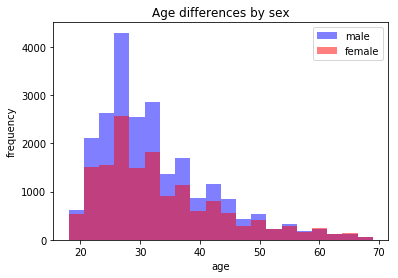

In [326]:
plt.hist(male_inds.age,bins=20, color="blue", alpha=0.5)
plt.hist(female_inds.age,bins=20, color="red", alpha=0.5)
plt.xlabel("age")
plt.ylabel("frequency")
plt.legend(('male', 'female'),loc='upper right')
plt.title("Age differences by sex")

plt.show()

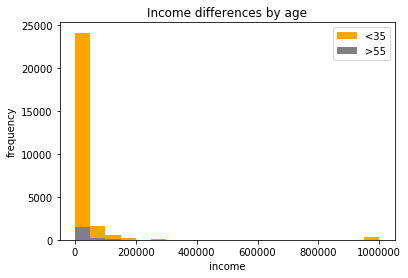

In [328]:
plt.hist(young_inds.income,bins=20, color="orange")
plt.hist(old_inds.income,bins=20, color="grey")
plt.xlabel("income")
plt.ylabel("frequency")
plt.legend(('<35', '>55'),loc='upper right')
plt.title("Income differences by age")

# plt.hist(male_inds.income,bins=20, color="blue")
# plt.hist(female_inds.income,bins=20, color="red")
# plt.title("Income differences by sex")
# plt.legend(('male', 'female'),loc='upper right')
plt.show()

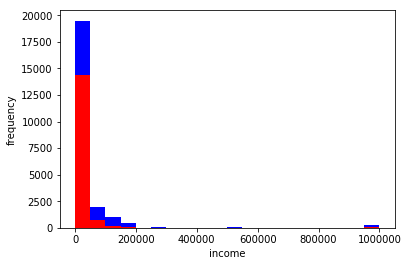

In [329]:
plt.hist(male_inds.income,bins=20, color="blue")
plt.hist(female_inds.income,bins=20, color="red")
plt.xlabel("income")
plt.ylabel("frequency")
plt.show()

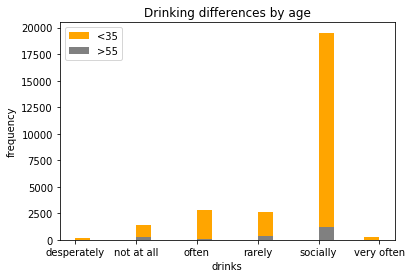

In [349]:
# plt.hist(male_inds.drinks,bins=20, color="blue")
# plt.hist(female_inds.drinks,bins=20, color="red")
plt.hist(young_inds.drinks,bins=20, color="orange")
plt.hist(old_inds.drinks,bins=20, color="grey")
plt.xlabel("drinks")
plt.ylabel("frequency")
# plt.legend(('male', 'female'),loc='upper left')
plt.legend(('<35', '>55'),loc='upper left')
plt.title("Drinking differences by age")

# plt.title("Drinking differences by sex")
plt.show()

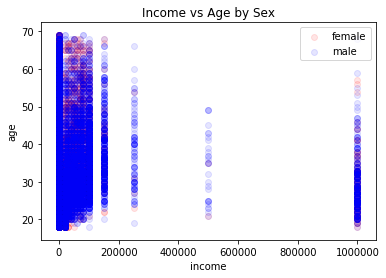

In [7]:
'''evaluate income, age and sex relationship'''

plt.scatter(female_inds.income, female_inds.age, color="red", alpha=0.1)
plt.scatter(male_inds.income, male_inds.age, color="blue", alpha=0.1)
# plt.scatter(female_inds.income, female_inds.height, color="pink", alpha=0.1)
# plt.scatter(male_inds.income, male_inds.height, color="k", alpha=0.1)
plt.xlabel("income")
plt.ylabel("age")
plt.legend(('female','male'),loc='upper right')
# plt.legend(('<35', '>55'),loc='upper left')
plt.title("Income vs Age by Sex")

# plt.title("Drinking differences by sex")
plt.show()

In [8]:
# mapping multiple choice columns to numerical values

drink_mapping = {"not at all":0, "rarely":1, "socially":2, "often":3, "very often": 4, "desperately":5}
df["drinks_code"]= df.drinks.map(drink_mapping)
# print(df.drinks_code.value_counts())

# print(df.smokes.value_counts())
smokes_mapping = {"no":0, "sometimes":1, "when drinking":2, "yes":3, "trying to quit": 4}
df["smokes_code"]= df.smokes.map(smokes_mapping)
# print(df.smokes_code.value_counts())

# print(df.drugs.value_counts())
drugs_mapping = {"never":0, "sometimes":1, "often":2}
df["drugs_code"]= df.drugs.map(drugs_mapping)
# print(df.drugs_code.value_counts())

# print(df.religion.value_counts())
all_religions = df["religion"].replace(np.nan,"",regex=True)  # remove all nans
religion_mapping = {}
for x in all_religions:  # map religion generally, remove all the modifiers
#     print(x)
    if "atheism" in x:
        religion_mapping[x] = 0
    elif "agnosticism" in x:
        religion_mapping[x] = 1
    elif "christianity" in x:
        religion_mapping[x] = 2
    elif "catholicism" in x:
        religion_mapping[x] = 3
    elif "judaism" in x:
        religion_mapping[x] = 4
    elif "buddhism" in x:
        religion_mapping[x] = 5
    elif "islam" in x:
        religion_mapping[x] = 6
    elif "other" in x:
        religion_mapping[x] = 7
# print(religion_mapping)
df["religion_code"]= df.religion.map(religion_mapping)
# print(df.religion_code.value_counts())

# print(df.education.value_counts())
all_education = df["education"].replace(np.nan,"",regex=True)  # remove all nans
education_mapping = {}
for x in all_education:  # map education generally, remove all the modifiers
#         print(x)
    if "high school" in x:
        education_mapping[x] = 0
    elif "two-year" in x:
        education_mapping[x] = 1
    elif "college/university" in x:
        education_mapping[x] = 2
    elif "masters program" in x:
        education_mapping[x] = 3
    elif "med school" in x:
        education_mapping[x] = 4
    elif "law school" in x:
        education_mapping[x] = 5
    elif "ph.d program" in x:
        education_mapping[x] = 6
    elif "space camp" in x:
        education_mapping[x] = 7
# print(education_mapping)
df["education_code"]= df.education.map(education_mapping)
# print(df.education_code.value_counts())

# print(df.sex.value_counts())
sex_mapping = {"m":0, "f":1}
df["sex_code"]= df.sex.map(sex_mapping)
# print(df.sex_code.value_counts())

# print(df.orientation.value_counts())
orientation_mapping = {"straight":0, "gay":1, "bisexual":2}
df["orientation_code"]= df.orientation.map(orientation_mapping)
# print(df.orientation_code.value_counts())

# print(df.status.value_counts())
status_mapping = {"single":0, "seeing someone":1, "available":2, "married":3, "unknown":4}
df["status_code"]= df.status.map(status_mapping)
# print(df.status_code.value_counts())

# print(df.income.value_counts())
income_mapping = {-1:0, 20000:1, 30000:2, 40000:3, 50000:4, 60000:5, 70000:6, 80000:7, 100000:8, 150000:9, 250000:10, 500000:11, 1000000:12}
df["income_code"]= df.income.map(income_mapping)
# print(df.income_code.value_counts())

mapped_columns = ["orientation_code", "sex_code", "religion_code", "drugs_code", "smokes_code", "drinks_code", "age", "status_code", "income_code", "education_code", "height"]

# plt.scatter(df.religion_code, df.drinks_code, alpha=0.05)
# plt.xlabel("religion")
# plt.ylabel("drinks")
# plt.show()
print('done')

done


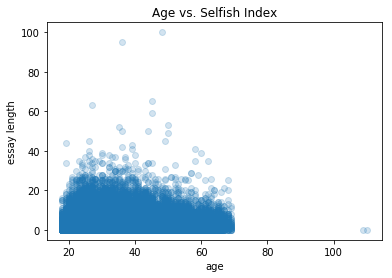

done


In [13]:
# mapping essay columns

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
all_essays = df[essay_cols].replace(np.nan,"",regex=True)  # remove all nans from the essay responses
# print(df[essay_cols].head())

all_essays = all_essays[essay_cols].apply(lambda x:"".join(x), axis=1)  # combine all essay answers
df["essay_len"] = all_essays.apply(lambda x: len(x))  # create a new column that reports the length of all essay answers
# print(df.essay_len[0])
df["unique_words"] = all_essays.apply(lambda x: len(set(x))) # create a new column that reports the number of unique words
df["selfish_index"] = all_essays.apply(lambda x: x.count("me ") + x.count("I ")) # create a new column that reports use of I and me
# print(df.selfish_index[0])

# plt.scatter(df.age, df.unique_words, alpha=0.2)
plt.scatter(df.age, df.selfish_index, alpha=0.2)  # younger people write more but use fewer unique words
# plt.scatter(df.unique_words, df.selfish_index, alpha=0.2)
# plt.scatter(df.unique_words, df.selfish_index/df.essay_len, alpha=0.2)
# plt.scatter(df.drugs, df.education_code, alpha=0.2)
plt.xlabel("age")
plt.ylabel("essay length")
# plt.legend(('female','male'),loc='upper right')
# plt.legend(('<35', '>55'),loc='upper left')
plt.title("Age vs. Selfish Index")

plt.show()

essay_columns_to_use = ["essay_len","unique_words","selfish_index"]
print('done')


In [14]:
#define features to consider and perform min-max normalization

mapped_columns = ["orientation_code", "sex_code", "religion_code", "drugs_code", "smokes_code", "drinks_code", "age", "status_code", "income_code", "education_code", "height"]
essay_columns_to_use = ["essay_len","unique_words","selfish_index"]
features_to_use = essay_columns_to_use + mapped_columns  # define list of columns to consider
features = df[features_to_use]
print(features.head())

features = features.dropna()  # remove rows with nans

# analyze male-female, young-old
male_inds = features.loc[features['sex_code'] == 0]
female_inds = features.loc[features['sex_code'] == 1]
young_inds = features.loc[features['age'] < 36]
old_inds = features.loc[features['age'] > 54]

print(features.head())

#normalize data
from sklearn import preprocessing

x=features.values
min_max_scale = preprocessing.MinMaxScaler()  # normalize dataset
x_scaled = min_max_scale.fit_transform(x)
features = pd.DataFrame(x_scaled, columns=features.columns)


   essay_len  unique_words  selfish_index  orientation_code  sex_code  \
0       2635            37             11                 0         0   
1       1444            41              1                 0         0   
2       5508            43             12                 0         0   
3        468            33              0                 0         0   
4        716            40              1                 0         0   

   religion_code  drugs_code  smokes_code  drinks_code  age  status_code  \
0            1.0         0.0          1.0          2.0   22            0   
1            1.0         1.0          0.0          3.0   35            0   
2            NaN         NaN          0.0          2.0   38            2   
3            NaN         NaN          0.0          2.0   23            0   
4            NaN         0.0          0.0          2.0   29            0   

   income_code  education_code  height  
0            0             2.0    75.0  
1            7        

[[0.40368872]]
[0.25648339]
score
0.06915597320512534
[[0.33722114]]


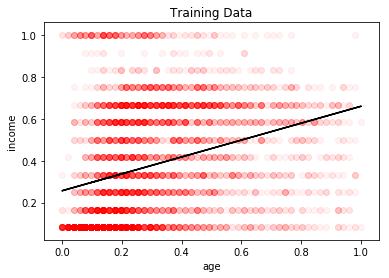

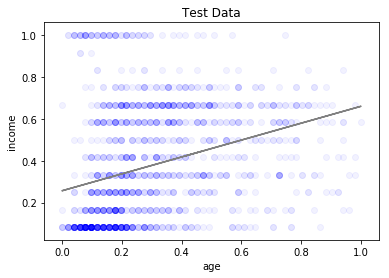

[[ 0.36423175 -0.09882617  0.25205984 -0.28675786  0.75519758]]
score
0.128948291688175


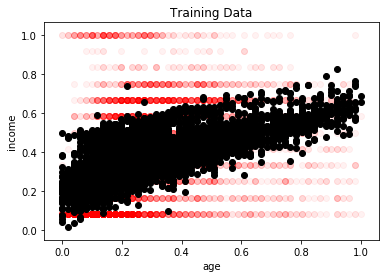

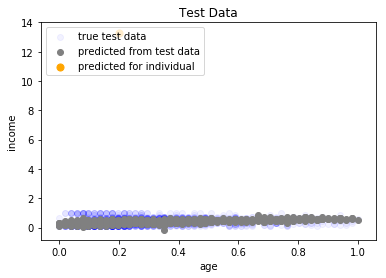

'-----'

In [15]:
# regression- can we predict income from age?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# x=features[['age']]
# y=np.array(features.income_code).reshape(-1,1)

non_zero_inds = features.loc[features['income_code'] != 0]
x = non_zero_inds[['age']]
y=np.array(non_zero_inds.income_code).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)  # split into train, test group
model = LinearRegression()
model.fit(x_train,y_train) # fit model
print(model.coef_)
print(model.intercept_)
pred = model.predict(x_test)  # test model with test data
pred_train = model.predict(x_train)
print("score")
print(model.score(x_test,y_test))  # give score for test data

d= {'age': [0.2]}  # create hypothetical data to use model to predict
test = pd.DataFrame(data=d)
pred2 = model.predict(test)
print(pred2)

plt.scatter(x_train['age'], y_train, color="red", alpha=0.05)
plt.plot(x_train['age'], pred_train, color="k", alpha=1)
plt.xlabel('age')
plt.ylabel("income")
plt.title("Training Data")
plt.show()

plt.scatter(x_test['age'],y_test, color="blue", alpha=0.05)
plt.plot(x_test['age'],pred, color="grey", alpha=1)
plt.xlabel('age')
plt.ylabel("income")
plt.title("Test Data")
plt.show()
#............................
# multiple linear regression- can we predict income better when we have many more variables defined?

x=non_zero_inds[['age','orientation_code', 'education_code', 'selfish_index', 'height']]
y=np.array(non_zero_inds.income_code).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
# print(model.intercept_)
pred = model.predict(x_test)
print("score")
print(model.score(x_test,y_test))
pred_train = model.predict(x_train)

# pred_color = ["blue" if x < 0.4 else "red" for x in pred]
plt.scatter(x_train['age'], y_train, color="red", alpha=0.05)
plt.scatter(x_train['age'], pred_train, color="k", alpha=1)
plt.xlabel('age')
plt.ylabel("income")
plt.title("Training Data")
plt.show()

plt.scatter(x_test['age'],y_test, color="blue", alpha=0.05)
plt.scatter(x_test['age'],pred, color="grey", alpha=1)
plt.xlabel('age')
plt.ylabel("income")
plt.title("Test Data")
# print(pred[0])


# print(pred_color[0:10])
# print(pred)
d = {'age': [0.2], 'height': [52], 'selfish_index':[0.7], 'education_code':[0.6],'orientation_code':[0.0]}
test = pd.DataFrame(data=d)
pred2 = model.predict(test)

plt.scatter(d['age'],pred2, color="orange", s=50)
plt.legend(("true test data", "predicted from test data", "predicted for individual"),loc='upper left')
plt.show()


0.0    5005
1.0    2102
Name: sex_code, dtype: int64
m    5005
f    2102
Name: sex, dtype: int64
0.0    6163
0.5     517
1.0     427
Name: orientation_code, dtype: int64
straight    6163
gay          517
bisexual     427
Name: orientation, dtype: int64
done
0.8270042194092827
['f']


c:\python27\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


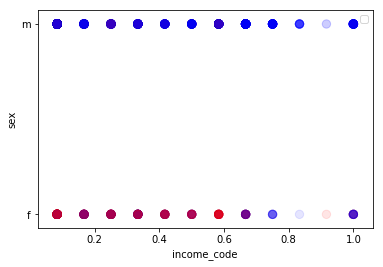

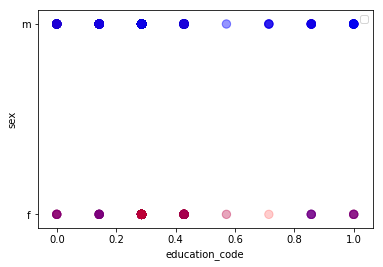

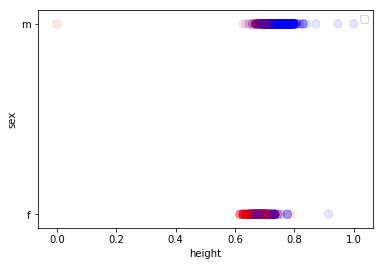

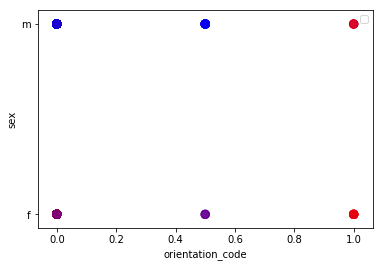

In [87]:
#knearest neighbors classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#create possible string base label columns
print(non_zero_inds.sex_code.value_counts())
sex_mapping2 = {0:"m", 1:"f"}
non_zero_inds["sex"]= non_zero_inds.sex_code.map(sex_mapping2)
print(non_zero_inds.sex.value_counts())

print(non_zero_inds.orientation_code.value_counts())
orientation_mapping2 = {0:"straight", 0.5:"gay", 1:"bisexual"}
non_zero_inds["orientation"]= non_zero_inds.orientation_code.map(orientation_mapping2)
print(non_zero_inds.orientation.value_counts())

#define x,y to split for training
x = non_zero_inds[['age','income_code', 'education_code', 'selfish_index', 'height','orientation_code']]
y = non_zero_inds.sex
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
print('done')

points = x_train[['age','income_code', 'education_code', 'selfish_index', 'height','orientation_code']]
labels = y_train

'''find best k value for classifier'''
# i_list = []
# ac_list = []
# f1_list = []
# pr_list = []

# for i in range(1,30):
#     classifier = KNeighborsClassifier(n_neighbors=i)  # optimal i is 65
#     classifier.fit(points,labels)
    
#     #test classifier
#     guess = classifier.predict(x_test)

#     ac = accuracy_score(y_test,guess)
#     re = recall_score(y_test,guess, average=None)
#     pr = precision_score(y_test,guess,average=None)
#     f1 = f1_score(y_test,guess,average=None)
#     i_list.append(i)
#     ac_list.append(ac)
#     f1_list.append(f1)
#     pr_list.append(pr)
#     print("the F1 metric is {0}, accuracy is {1}, recall is {2}, and precision is {3}").format(f1,ac,re,pr)

# Plot accuracy metrics
# plt.plot(i_list,ac_list, color='red')
# plt.legend("Accuracy")
# plt.xlabel("k-neighbors")
# plt.ylabel("sex")

'''use the best k value going forward'''
classifier = KNeighborsClassifier(n_neighbors=8)  # optimal i is 65
classifier.fit(points,labels)
#test classifier
guess = classifier.predict(x_test)
print(classifier.score(x_test,y_test))
pred_color = ["blue" if x == 'm' else "red" for x in guess]

'''test case'''
d = {'age': [0.3], 'height': [0.6], 'selfish_index':[0.7], 'education_code':[0.6],'orientation_code':[0], 'income_code': [0.4]}
test = pd.DataFrame(data=d)
pred2 = classifier.predict(test)
print(pred2)

#plot what descriptors are well segregated
plt.scatter(x_test["income_code"],y_test, color=pred_color, s=70, alpha=0.1)
plt.xlabel('income_code')
plt.ylabel('sex')
plt.legend('predicted Male','predicted Female')
plt.show()

plt.scatter(x_test["education_code"],y_test, color=pred_color, s=70, alpha=0.1)
plt.xlabel('education_code')
plt.ylabel('sex')
plt.legend('predicted Male','predicted Female')
plt.show()

plt.scatter(x_test["height"],y_test, color=pred_color, s=70, alpha=0.1)
plt.xlabel('height')
plt.ylabel('sex')
plt.legend('predicted Male','predicted Female')
plt.show()

plt.scatter(x_test["orientation_code"],y_test, color=pred_color, s=70, alpha=0.1)
plt.xlabel('orientation_code')
plt.ylabel('sex')
plt.legend('predicted Male','predicted Female')
plt.show()


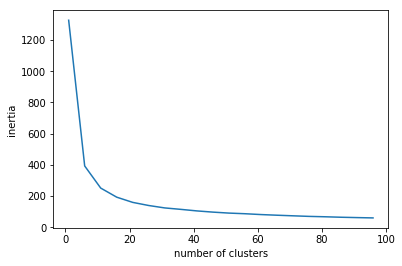

In [99]:
#unsupervised method (kmeans)-- segment the data in best way possbile

from sklearn.cluster import KMeans 

ilist= []
inert= []

for i in range(1,100, 5):  # find the best number of clusters to consider- try to minimize inertia
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(x_train)
    new_labels = model.predict(x_test)
    inertia = model.inertia_
    inert.append(inertia)
    ilist.append(i)

plt.plot(ilist,inert)
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

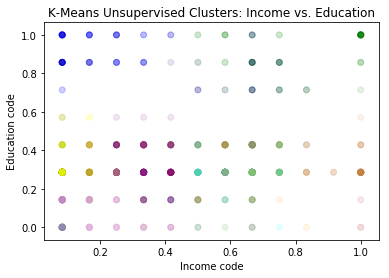

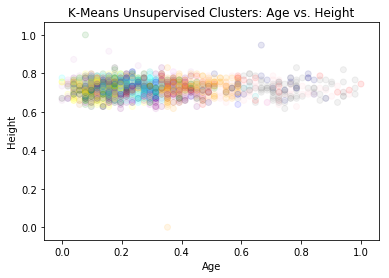

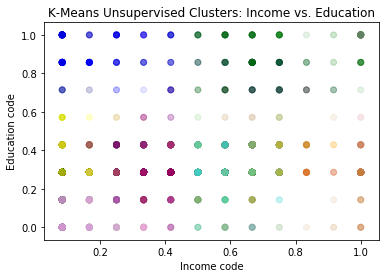

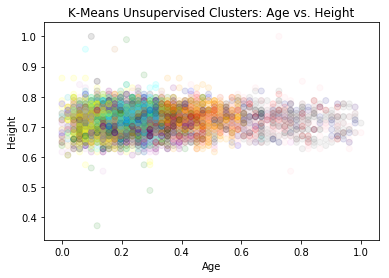

In [106]:
# k-means unsupervised classification-- compare similarities between test and train groupings

model = KMeans(n_clusters=15, random_state=1)
model.fit(x_train)
new_labels = model.predict(x_test)

# map colors to the different k-means grouping to visualize distinctions in the data
color_mapping = {0:"yellow", 1:"orange", 2:"red", 3:"purple", 4:"blue", 5:"k", 6:"pink", 7:"green", 8:"grey", 9:"violet", 10:"plum", 11:"navy", 12:"c", 13:"aqua",14:"peru"}
colors_list = []
for label in new_labels:
    colors_list.append(color_mapping[label])

# print(np.array(x_test["income_code"].shape()))

plt.scatter(x_test["income_code"], x_test["education_code"], color=colors_list, alpha=0.1)
plt.xlabel("Income code")
plt.ylabel("Education code")
plt.title("K-Means Unsupervised Clusters: Income vs. Education")
plt.show()

plt.scatter(x_test["age"], x_test["height"], color=colors_list, alpha=0.1)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("K-Means Unsupervised Clusters: Age vs. Height")
plt.show()
# plot what descriptors are well segregated

# print(np.unique(new_labels))
color_mapping = {0:"yellow", 1:"orange", 2:"red", 3:"purple", 4:"blue", 5:"k", 6:"pink", 7:"green", 8:"grey", 9:"violet", 10:"plum", 11:"navy", 12:"c", 13:"aqua",14:"peru"}
colors_list = []
for label in new_labels:
    colors_list.append(color_mapping[label])


new_labels = model.predict(x_train)

# print(np.unique(new_labels))
color_mapping = {0:"yellow", 1:"orange", 2:"red", 3:"purple", 4:"blue", 5:"k", 6:"pink", 7:"green", 8:"grey", 9:"violet", 10:"plum", 11:"navy", 12:"c", 13:"aqua",14:"peru"}
colors_list = []
for label in new_labels:
    colors_list.append(color_mapping[label])
    
plt.scatter(x_train["income_code"], x_train["education_code"], color=colors_list, alpha=0.1)
plt.xlabel("Income code")
plt.ylabel("Education code")
plt.title("K-Means Unsupervised Clusters: Income vs. Education")
plt.show()

plt.scatter(x_train["age"], x_train["height"], color=colors_list, alpha=0.1)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("K-Means Unsupervised Clusters: Age vs. Height")
plt.show()



In [ ]:
## To find good dating matches in the dataset, might want to identify people within the same k-means cluster. Separate out the 
## male and female indicies and match up straight couples within the same group. Could further segment by age, and obviously
## by orientation
